# Trabajo práctico 4 

Aritmética de Punto Fijo usando la clase de Python fixedInt.py 

## Ejercicio 1 

Se observa la diferencia entre filtros calculados con punto fijo, para observar el **error cuantización** sobre los coeficientes 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *    # Modulo de punto fijo de Fulgor 

1) Creamos tres filtros con diferentes rolloff.
 
 Utilizamos la función definida para creal el filtro de *raised cosine*

In [4]:
def rcosine(beta, Tbaud, oversampling, Nbauds, Norm):
    """ Respuesta al impulso del pulso de caida cosenoidal """
    t_vect = np.arange(-0.5*Nbauds*Tbaud, 0.5*Nbauds*Tbaud, 
                       float(Tbaud)/oversampling)

    y_vect = []
    for t in t_vect:
        y_vect.append(np.sinc(t/Tbaud)*(np.cos(np.pi*beta*t/Tbaud)/
                                        (1-(4.0*beta*beta*t*t/
                                            (Tbaud*Tbaud)))))

    y_vect = np.array(y_vect)

    if(Norm):
        return (t_vect, y_vect/np.sqrt(np.sum(y_vect**2)))
        #return (t_vect, y_vect/y_vect.sum())
    else:
        return (t_vect,y_vect)

Definimos los parametros del filtro 

* Baud Rate 
* Oversampling  
* Rolloff = $\beta$ 
* Frecuencia de muestreo fs 
* Separacion entre simbolos = T (cada cruce por cero del filtro) 


In [9]:
BR = 1e9;                   # Baud Rate 
NB = 16;                    # Numero de simbolos
N = 16;                     # Tasa de sobremuestreo
Beta = [0.0, 0.5, 1.0]      # Rolloff 
fs = N*BR                   # Frecuencia de muestreo 
T = 1/BR                    # Periodo de Baud Rate (Separacion entre symbolos)
Ts = 1/fs                   # Periodo de muestreo (=T/N)


Calculamos los 3 filtros con diferente exceso de ancho de banda y

2) Graficamos sus coeficientes (respuesta al impulso por definicion) 

Text(0, 0.5, 'Magnitud')

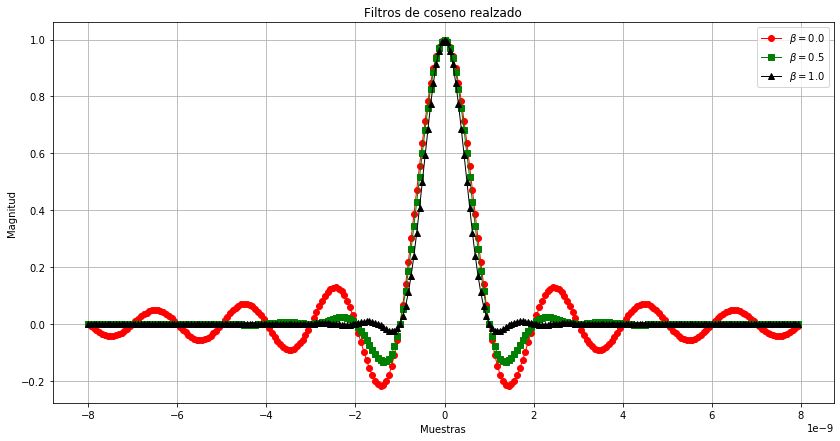

In [14]:
(t,h0) = rcosine(Beta[0], T,N,NB,Norm=False)
(t,h1) = rcosine(Beta[1], T,N,NB,Norm=False)
(t,h2) = rcosine(Beta[2], T,N,NB,Norm=False)


### Generacion de las graficas
plt.figure(figsize=[14,7])
plt.plot(t,h0,'ro-',linewidth=1.0,label=r'$\beta=0.0$')
plt.plot(t,h1,'gs-',linewidth=1.0,label=r'$\beta=0.5$')
plt.plot(t,h2,'k^-',linewidth=1.0,label=r'$\beta=1.0$')
plt.legend()
plt.grid(True)
#plt.xlim(0,len(rc0)-1)
plt.title("Filtros de coseno realzado")
plt.xlabel('Muestras')
plt.ylabel('Magnitud')

3) Graficamos los simbolos a transimitir filtrados con estos filtros obtenidos anteriormente, realizando la convolucion 

* Definimos la funcion que calcule la convolucion 
